## Tâche 6 : xrd
Objectif : déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import *

In [2]:
# clé API Materials Project
mp_key = "hbfwQnxIfLcB2CMDIPBvWEJViltnasHl" # Clé API
mp_id = "mp-8145"  # Identifiant matériau

In [3]:
# Téléchargement de la structure du matériau
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Calculs et explications
On obtient le diffractogramme grâce à la diffraction d'un faisceau de rayons X (rayons CuKα de longueur d’onde λ=1.54060Å) sur la surface de notre échantillon. Cela engendre des interférences constructives lorsque la loi de Bragg est respectée :

$$
2d \cdot sin(\theta) = n \cdot \lambda
$$
où :\
    - d est la distance interréticulaire.\
    - θ est l'angle de Bragg, soit le demi-angle de déviation (la moitié de l'angle entre le faisceau incident et la direction du détecteur).\
    - n est l'ordre de diffraction.\
    - λ la longueur d'onde des rayons X.

L'intensité des pics tend à diminuer lorsque θ augmente puisqu'elle est liée au facteur de forme atomique qui diminue lorsque θ augmente. L'intensité des pics est aussi directement proportionelle à la mutliplicité du plan associé.

In [4]:
# Rayonnement X incident CuKα
xrd = XRDCalculator(wavelength='CuKa1')
pattern = xrd.get_pattern(structure)

In [7]:
# Pics de diffraction
for i in range(3):
    print("---------------------")
    print("Pic de diffraction", i+1)
    print("---------------------")
    print("Indices (hkl) associés et leur multiplicité :", pattern.hkls[i])
    print("Distance interplanaire                       :", pattern.d_hkls[i],"Å")
    print("Angle 2θ associé                             :", pattern.x[i],"°")
    print("Intensité du pic                             :", pattern.y[i], "\n")

---------------------
Pic de diffraction 1
---------------------
Indices (hkl) associés et leur multiplicité : [{'hkl': (1, 1, 1), 'multiplicity': 2}]
Distance interplanaire                       : 6.411512348159716 Å
Angle 2θ associé                             : 13.80038120541785 °
Intensité du pic                             : 6.479550829173723 

---------------------
Pic de diffraction 2
---------------------
Indices (hkl) associés et leur multiplicité : [{'hkl': (2, 2, 2), 'multiplicity': 2}]
Distance interplanaire                       : 3.205756174079858 Å
Angle 2θ associé                             : 27.80616692575419 °
Intensité du pic                             : 37.97041826914264 

---------------------
Pic de diffraction 3
---------------------
Indices (hkl) associés et leur multiplicité : [{'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance interplanaire                       : 2.7920493401587203 Å
Angle 2θ associé                             : 32.029329116729635 °
Intensité

## Graphe représentant les 3 premiers pics de diffraction
On retrouve bien les 3 mêmes premiers pics ques sur Material Project.

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

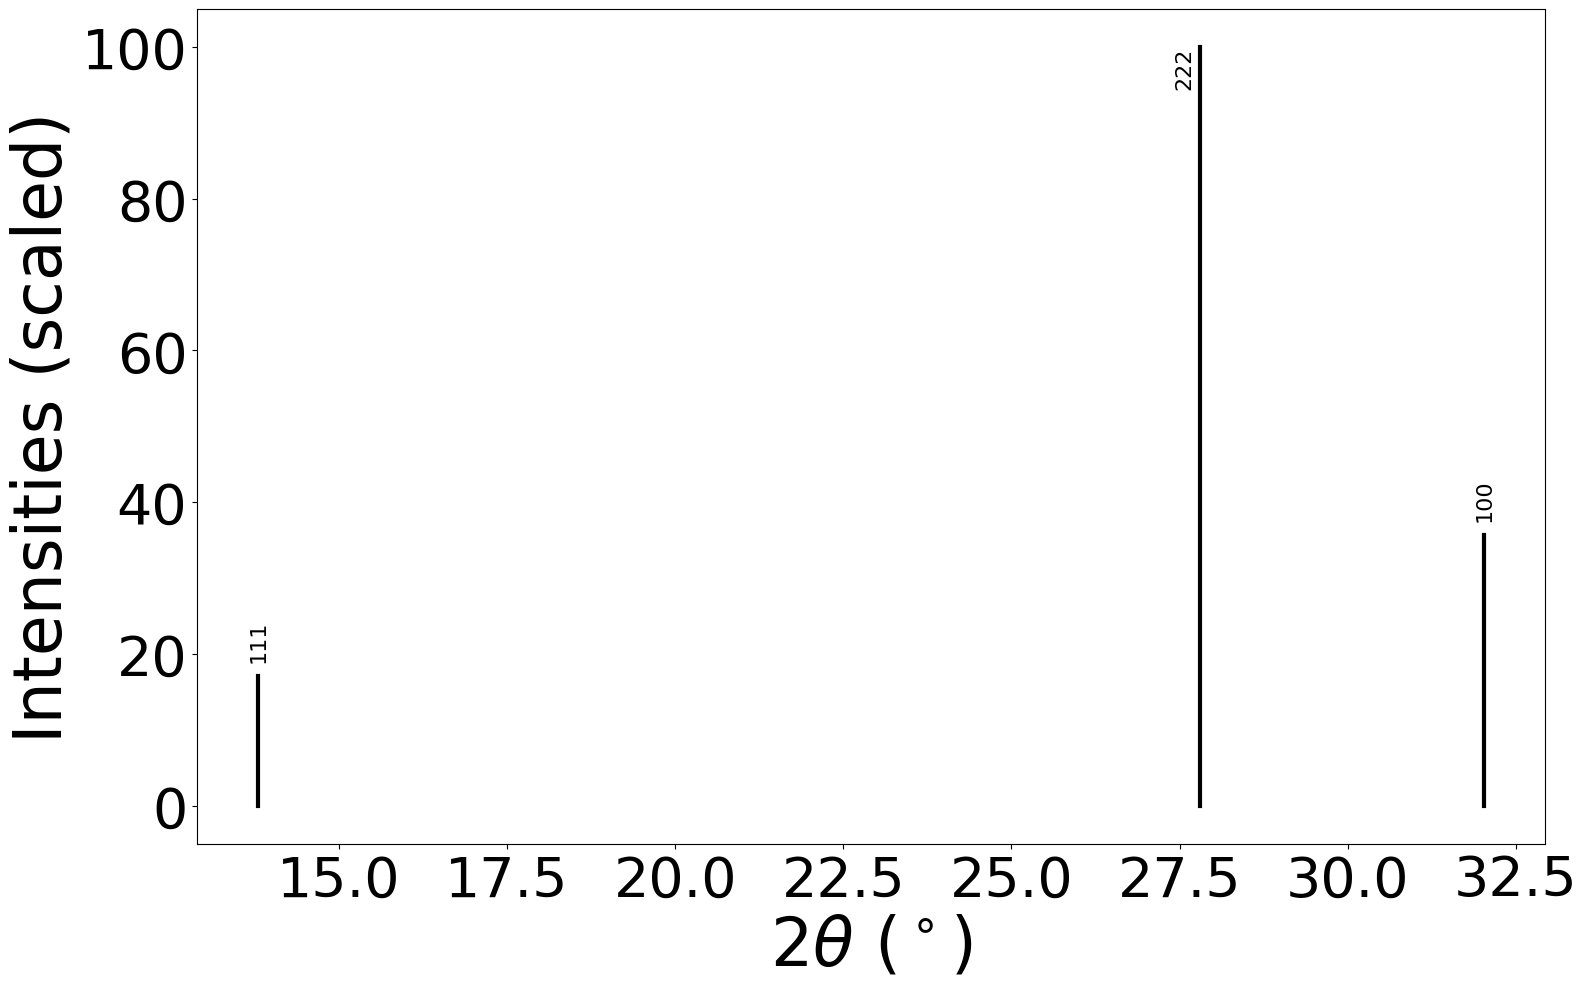

In [6]:
xrd.get_plot(structure, two_theta_range=(0,33))